<a href="https://colab.research.google.com/github/gargjayant/102117156-SESS_LE1/blob/main/102117156_Jayant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: **Jayant Garg**  
Email: `jgarg_be21@thapar.edu`  
Roll No: **102117156**  
Group: **4CS6**  
Start Timestamp: 20240911-1156  

1 Logistics
===========

  + Start time: Wed Sep 11 10:00 AM
  + End Time: Wed Sep 11 04:00 PM
  + Submission Form:
    <https://docs.google.com/forms/d/e/1FAIpQLSc2aAG33E0rQgs3OsrpyjyREwy9OKK_WnKqmBLvD7pzM4sOvg/viewform?usp=sf_link>
  + Viva Voce: Will be notified later.


2 Task
======

  Consider the paper: <https://arxiv.org/abs/1804.03209>

  1. Read and summarise the paper in about 50 words.
  2. Download the dataset in the paper, statistically analyse and
     describe it, so that it may be useful for posterity. (Include code
     snippets in your .ipynb file to evidence your analysis.)
  3. Train a classifier so that you are able to distinguish the commands
     in the dataset.
  4. Report the performance results using standard benchmarks.
  5. Record about 30 samples of each command in your voice and create a
     new dataset (including a new user id for yourself).  You may use a
     timer on your computer to synchronise.
  6. Fine tune your classifier to perform on your voice.
  7. Report the results.


3 Deliverables
==============

  1. A PDF Report: (as a part of your Git Repo) named
     <ROLL_NO>-report.pdf
  2. Assets: Your pretrained classifier model weights and your cleaned
     and well-formed dataset.  This should be a part of your google
     drive with read access to your instructor <bv.raghav@thapar.edu>
  3. A demo notebook: (as a part of your Git Repo), that loads both your
     model and dataset; and runs to show the results.
  4. The demo notebook should verify the assets using a checksum
     (md5/sha/…).  This step verifies that the assets have not been
     tampered with at a later stage.


4 Evaluation
============

  1. Clarity of thought process and presentation.
  2. Data processing skills.
  3. Model fine tuning/ training skills.
  4. Details of progress, as in what were the encountered problems and
     how were they solved.
  5. How adaptable is your pipeline? (as in, how easy is it for me to
     adapt it for my voice)
  6. How scalable is your approach? (as in, how easy is it to scale it
     to many new voices)
  7. Strengths and Shortcomings of your approach.


5 Note
======

  1. This is a test of how fast can we report the performance of a model
     for a specific task.  The best performance is not expected; but a
     holistic pipeline is.
  2. You may improve upon it in future, out of interest; though it
     wouldn’t influence your eval.

## Solution

In [1]:
import torch

def createNnClassifier(d,H,C) :
  ## FIXME: Create the model here.  Identity is just a dummy
  model = torch.nn.Identity()

  return model

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim


In [13]:
!pip install torchaudio


In [15]:
import torchaudio
from torch.utils.data import DataLoader

# Download and load the Speech Commands dataset
dataset = torchaudio.datasets.SPEECHCOMMANDS(
    root='.',  # Specify the folder where you want the dataset
    download=True  # Set to True to download the dataset
)

# Set up a DataLoader for batch processing
data_loader = DataLoader(dataset, batch_size=16, shuffle=True)


100%|██████████| 2.26G/2.26G [01:45<00:00, 23.0MB/s]


In [16]:
!pip install torch torchaudio matplotlib numpy


In [17]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [18]:
dataset = torchaudio.datasets.SPEECHCOMMANDS(root='.', download=True)

In [19]:
# Initialize variables to gather statistics
durations = []  # To store the durations of audio files
labels = []     # To store the labels (words)
total_samples = 0  # Total number of audio samples


In [20]:
for waveform, sample_rate, label, *_ in dataset:
    total_samples += 1
    # Calculate the duration in seconds and store it
    duration = waveform.shape[1] / sample_rate
    durations.append(duration)
    labels.append(label)

    # 1. Total number of samples in the dataset
print(f'Total number of audio samples: {total_samples}')

# 2. Class distribution (number of samples per word)
label_counts = Counter(labels)
print(f'Distribution of words in the dataset: {label_counts}')

Total number of audio samples: 105829
Distribution of words in the dataset: Counter({'five': 4052, 'zero': 4052, 'yes': 4044, 'seven': 3998, 'no': 3941, 'nine': 3934, 'down': 3917, 'one': 3890, 'go': 3880, 'two': 3880, 'stop': 3872, 'six': 3860, 'on': 3845, 'left': 3801, 'eight': 3787, 'right': 3778, 'off': 3745, 'four': 3728, 'three': 3727, 'up': 3723, 'dog': 2128, 'wow': 2123, 'house': 2113, 'marvin': 2100, 'bird': 2064, 'happy': 2054, 'cat': 2031, 'sheila': 2022, 'bed': 2014, 'tree': 1759, 'backward': 1664, 'visual': 1592, 'follow': 1579, 'learn': 1575, 'forward': 1557})


In [29]:
type(label_counts)

collections.Counter

In [21]:
durations = np.array(durations)
mean_duration = durations.mean()
std_duration = durations.std()
min_duration = durations.min()
max_duration = durations.max()

print(f'Mean duration of audio files: {mean_duration:.4f} seconds')
print(f'Standard deviation of audio durations: {std_duration:.4f} seconds')
print(f'Minimum duration: {min_duration:.4f} seconds')
print(f'Maximum duration: {max_duration:.4f} seconds')

Mean duration of audio files: 0.9809 seconds
Standard deviation of audio durations: 0.0718 seconds
Minimum duration: 0.2133 seconds
Maximum duration: 1.0000 seconds


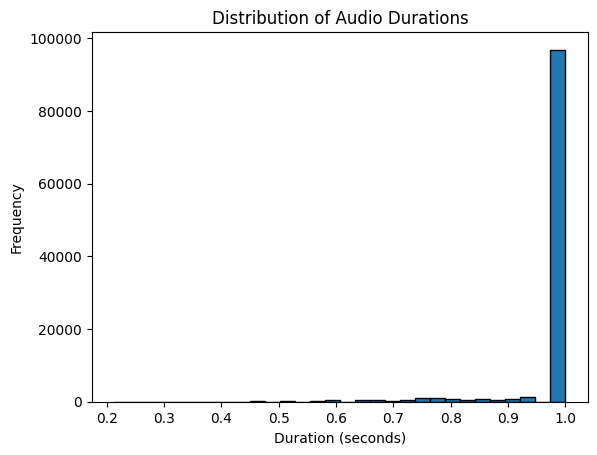

In [22]:
plt.hist(durations, bins=30, edgecolor='black')
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

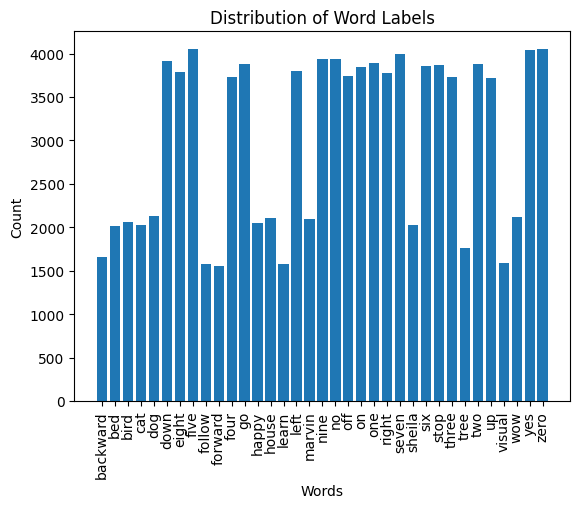

In [23]:
labels, counts = zip(*label_counts.items())
plt.bar(labels, counts)
plt.title('Distribution of Word Labels')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()